## Agenda

- To create a processing pipepline and in order to determine wheather a flight gets delayed or not
- Apply logistic regression, decision tree and SVM models using grid search and compare the results
- Fitting an ensemble using the above methods and ascertain if the performance is improved
- In Addition, use Adaptive boosting technique and ascertain if it improves the performance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate
import plotly.graph_objects as go
import plotly.offline as py
import seaborn as sns

In [ ]:
#Read DataFrame
dataset = pd.read_csv('https://raw.githubusercontent.com/Vaibhav-1911/DATA-602/main/Assignment%208/flight-data.csv')
dataset

carrier  flight tailnum origin dest  air_time  distance  hour  minute  \
0         B6    1201  N643JB    JFK  FLL     135.0      1069    21      50   
1         DL    1773  N3743H    JFK  LAS     287.0      2248    15      35   
2         EV    4572  N11107    EWR  GSP      84.0       594    15       9   
3         B6     179  N526JB    JFK  PHX     305.0      2153    17      35   
4         US    1733  N162UW    LGA  CLT      78.0       544     7      53   
...      ...     ...     ...    ...  ...       ...       ...   ...     ...   
9995      UA     535  N525UA    JFK  LAX     323.0      2475    18      35   
9996      DL    1147  N977DL    LGA  ATL     106.0       762    20       0   
9997      EV    4204  N12163    EWR  OKC       NaN      1325    20       9   
9998      B6     431  N585JB    LGA  SRQ     146.0      1047    13      30   
9999      B6    2302  N368JB    JFK  BUF      64.0       301    16      15   

       temp  ...  precip  pressure  visib                     type  \
0     73.04  ...     0.0    1019.4   10.0  Fixed wing multi engine   
1     71.06  ...     0.0    1020.4   10.0  Fixed wing multi engine   
2     78.80  ...     0.0       NaN    5.0  Fixed wing multi engine   
3     44.06  ...     0.0    1009.2   10.0                      NaN   
4     69.98  ...     0.0    1021.3   10.0  Fixed wing multi engine   
...     ...  ...     ...       ...    ...                      ...   
9995  48.92  ...     0.0    1025.3   10.0                      NaN   
9996  75.02  ...     0.0    1017.3   10.0  Fixed wing multi engine   
9997  37.04  ...     0.0    1017.0    9.0  Fixed wing multi engine   
9998  35.96  ...     0.0    1016.9   10.0  Fixed wing multi engine   
9999  84.02  ...     0.0    1013.0   10.0  Fixed wing multi engine   

                       manufacturer            model  engines  seats  \
0                            AIRBUS         A320-232      2.0  200.0   
1                            BOEING          737-832      2.0  189.0   
2                           EMBRAER        EMB-145XR      2.0   55.0   
3                               NaN              NaN      NaN    NaN   
4                  AIRBUS INDUSTRIE         A321-211      2.0  199.0   
...                             ...              ...      ...    ...   
9995                            NaN              NaN      NaN    NaN   
9996  MCDONNELL DOUGLAS AIRCRAFT CO            MD-88      2.0  142.0   
9997                        EMBRAER        EMB-145XR      2.0   55.0   
9998                         AIRBUS         A320-232      2.0  200.0   
9999                        EMBRAER  ERJ 190-100 IGW      2.0   20.0   

         engine arr_delay  
0     Turbo-fan       1.0  
1     Turbo-jet       0.0  
2     Turbo-fan       1.0  
3           NaN       1.0  
4     Turbo-jet       0.0  
...         ...       ...  
9995        NaN       1.0  
9996  Turbo-fan       1.0  
9997  Turbo-fan       NaN  
9998  Turbo-fan       1.0  
9999  Turbo-fan       0.0  

[10000 rows x 25 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier       10000 non-null  object 
 1   flight        10000 non-null  int64  
 2   tailnum       9926 non-null   object 
 3   origin        10000 non-null  object 
 4   dest          10000 non-null  object 
 5   air_time      9716 non-null   float64
 6   distance      10000 non-null  int64  
 7   hour          10000 non-null  int64  
 8   minute        10000 non-null  int64  
 9   temp          9952 non-null   float64
 10  dewp          9952 non-null   float64
 11  humid         9952 non-null   float64
 12  wind_dir      9731 non-null   float64
 13  wind_speed    9951 non-null   float64
 14  wind_gust     2387 non-null   float64
 15  precip        9954 non-null   float64
 16  pressure      8808 non-null   float64
 17  visib         9954 non-null   float64
 18  type          8499 non-null

In [ ]:
dataset1 = dataset.drop(["carrier", "tailnum", "origin", "dest", "type", "manufacturer", "model", "engine"], axis=1)

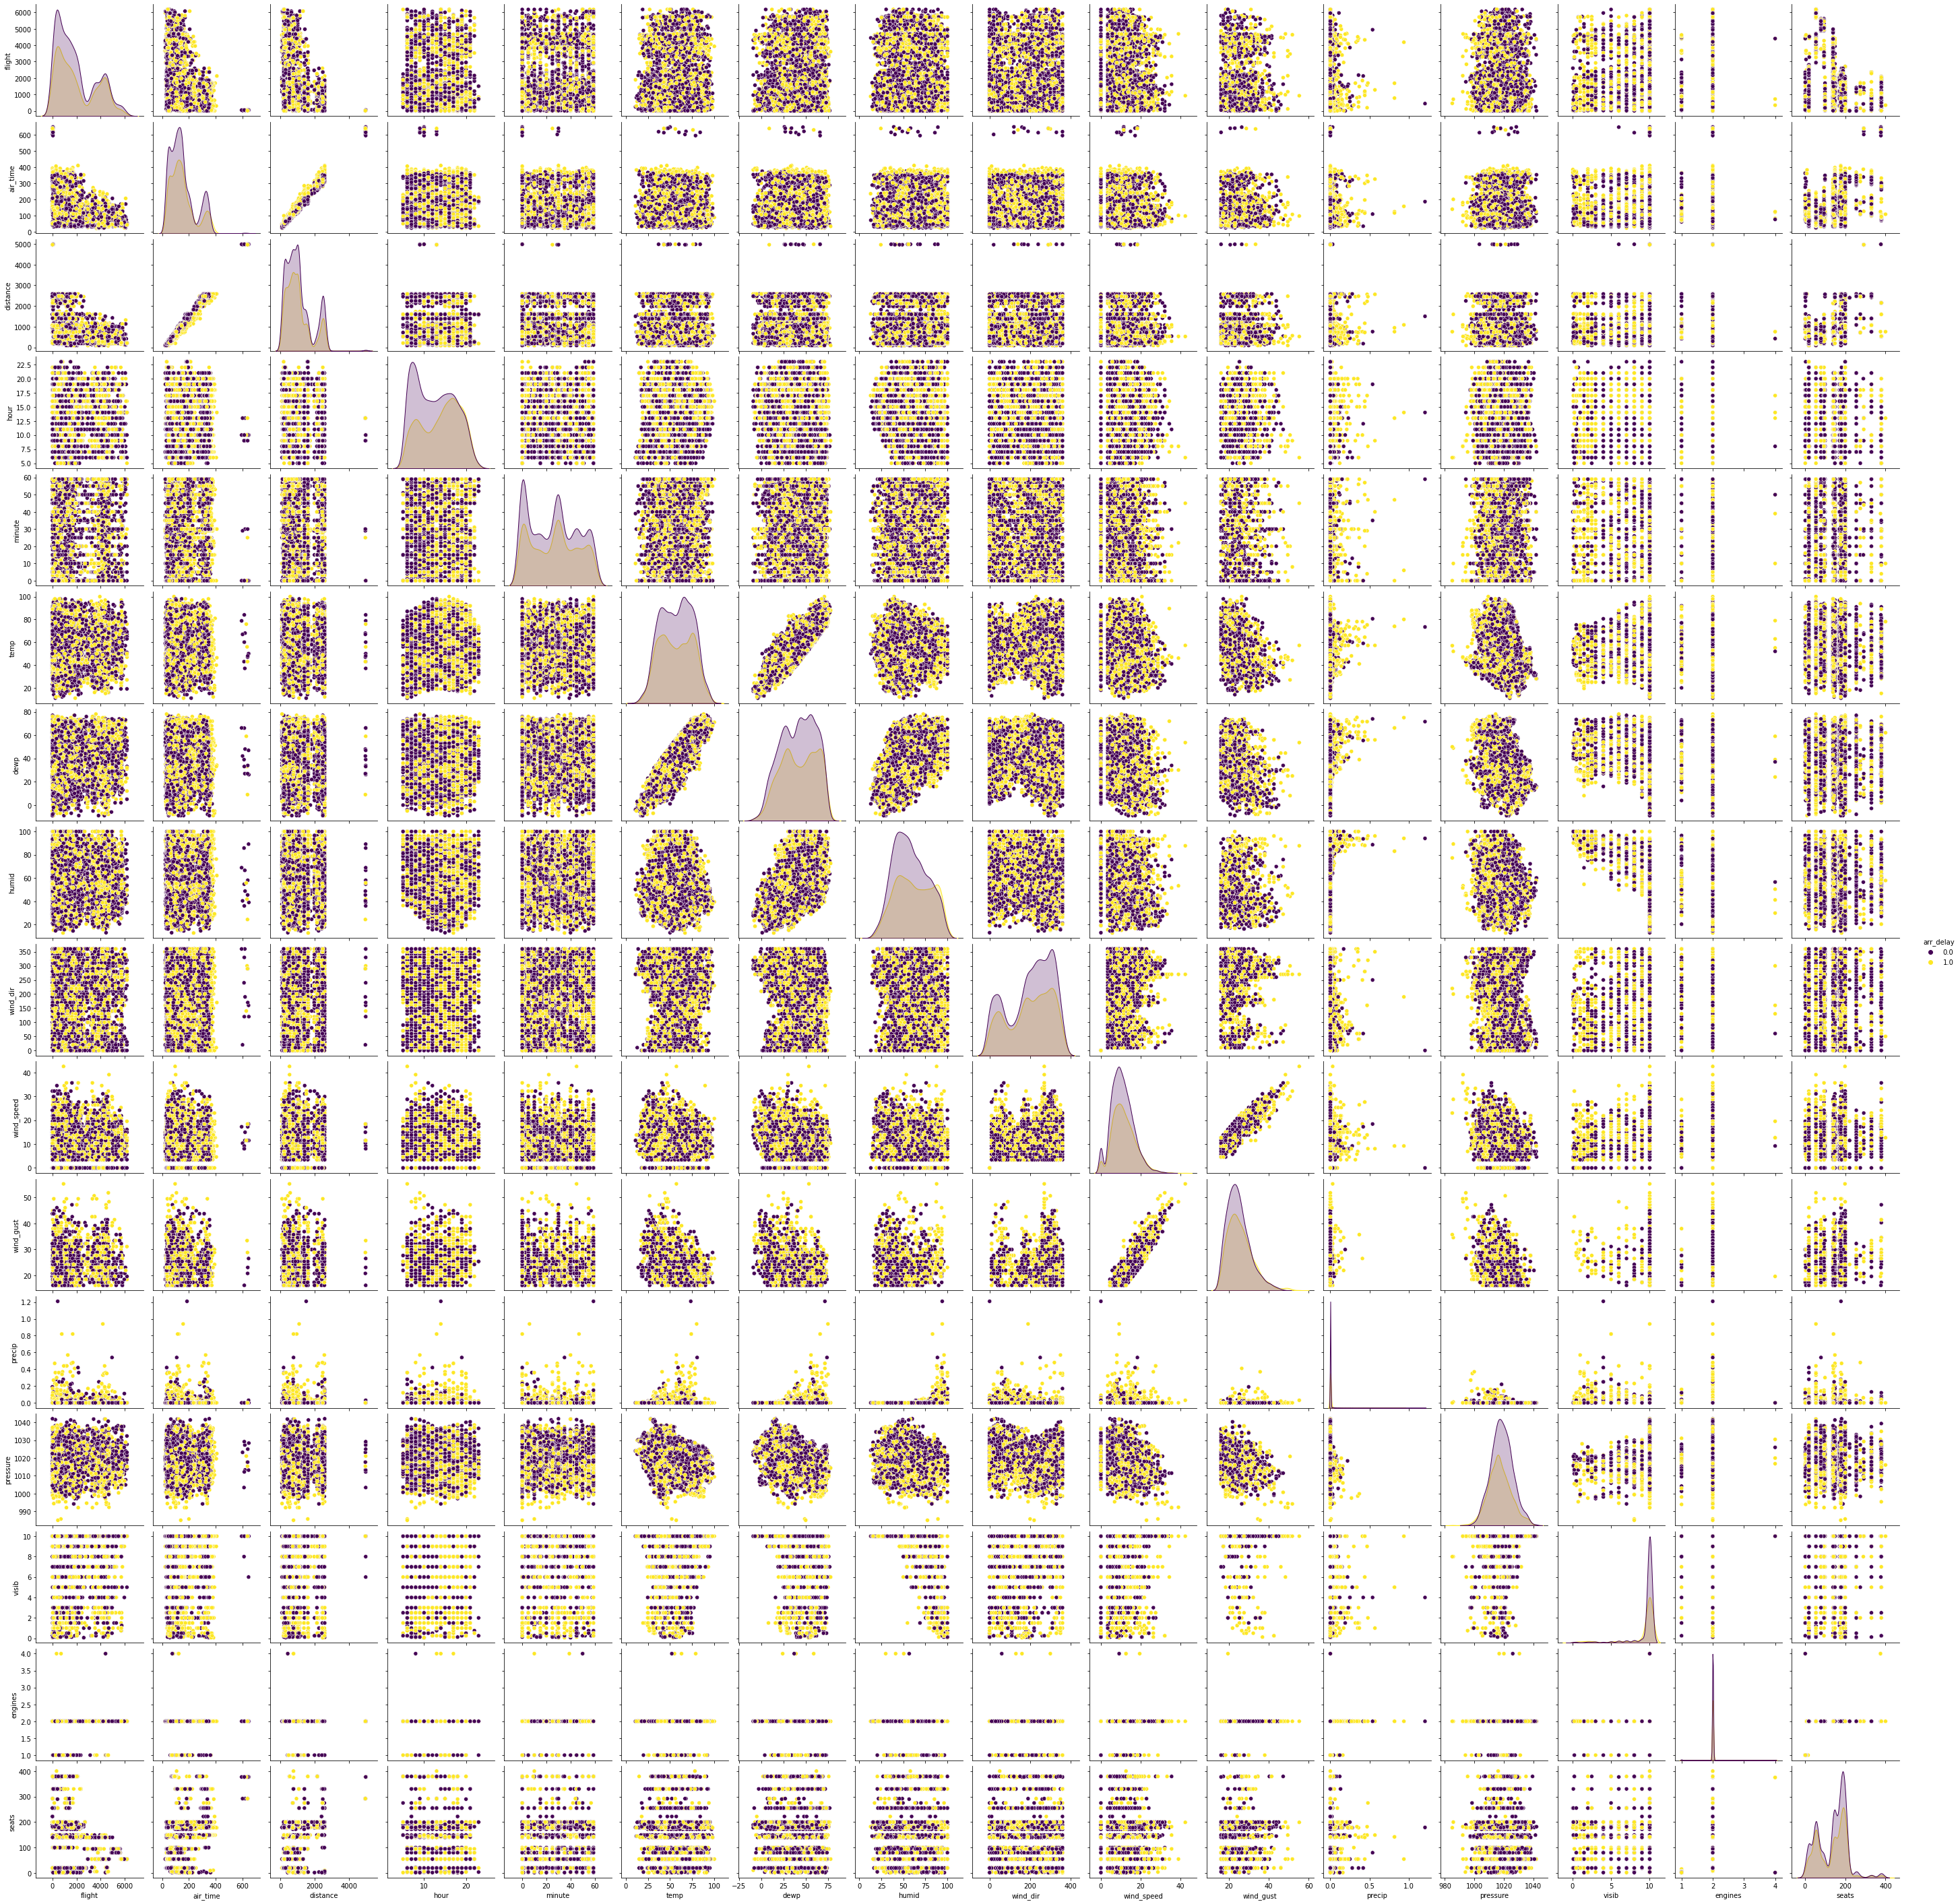

In [ ]:
sns.pairplot(dataset1, hue = 'arr_delay', palette = 'viridis')

### Checking Null Values

<AxesSubplot:>

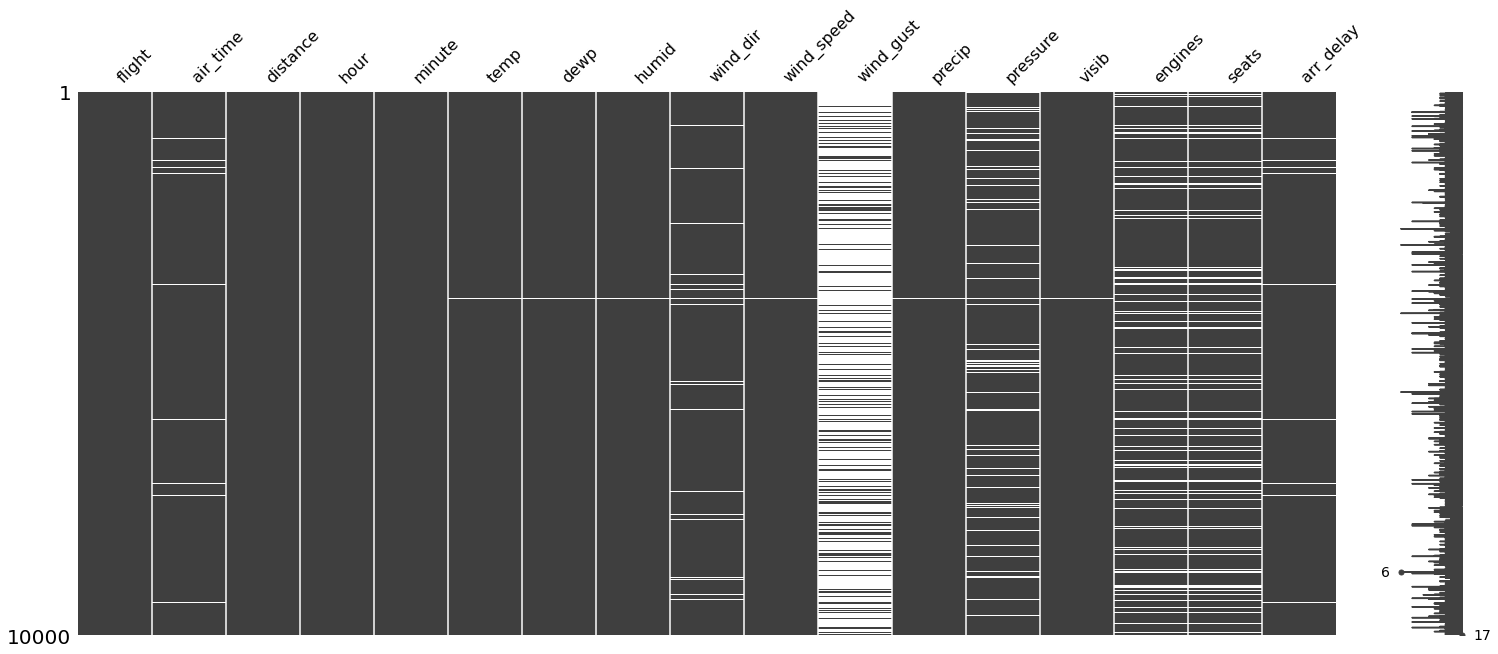

In [ ]:
import missingno as msno
msno.matrix(dataset1)

In [ ]:
dataset2 = dataset1.apply(lambda x: x.fillna(x.mean()),axis=0)

<AxesSubplot:>

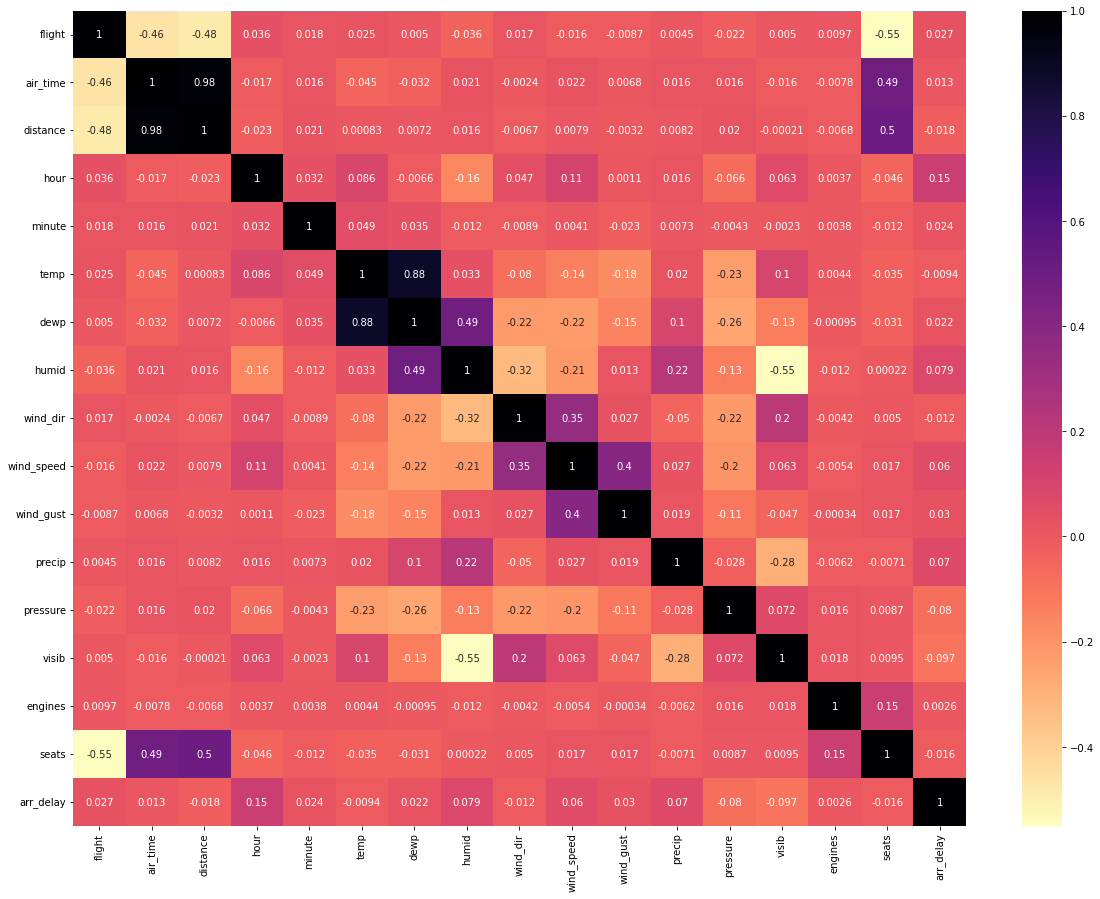

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(dataset2.corr(), annot = True,cmap = 'magma_r')

**We cannot see a major correlation between arr_delay and the rest of the attributes individually. This means that a couple of factors must be at play altogether leading to the conclusion wheather a flight will me delayed or not.**

**Since there is not a significant correlation between arr_delay and other factors, there is a possibility that our model might not perform well and may depict substandard accuracy levels**

In [ ]:
X=dataset2.iloc[:,0:16]
print(X)

      flight    air_time  distance  hour  minute   temp   dewp  humid  \
0       1201  135.000000      1069    21      50  73.04  66.92  81.14   
1       1773  287.000000      2248    15      35  71.06  42.98  36.28   
2       4572   84.000000       594    15       9  78.80  69.80  73.95   
3        179  305.000000      2153    17      35  44.06  14.00  29.23   
4       1733   78.000000       544     7      53  69.98  53.96  56.78   
...      ...         ...       ...   ...     ...    ...    ...    ...   
9995     535  323.000000      2475    18      35  48.92  15.98  26.52   
9996    1147  106.000000       762    20       0  75.02  57.92  55.28   
9997    4204  149.771099      1325    20       9  37.04  33.98  88.57   
9998     431  146.000000      1047    13      30  35.96  19.94  51.78   
9999    2302   64.000000       301    16      15  84.02  57.92  41.15   

      wind_dir  wind_speed  wind_gust  precip     pressure  visib   engines  \
0        160.0    13.80936   19.56326     0.

In [ ]:
dataset2["arr_delay"] = dataset2["arr_delay"].astype(int)

In [ ]:
target=dataset2.iloc[:,16]
print(target)

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: arr_delay, Length: 10000, dtype: int32


### Splitting The Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size = 0.20)

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   flight      10000 non-null  int64  
 1   air_time    10000 non-null  float64
 2   distance    10000 non-null  int64  
 3   hour        10000 non-null  int64  
 4   minute      10000 non-null  int64  
 5   temp        10000 non-null  float64
 6   dewp        10000 non-null  float64
 7   humid       10000 non-null  float64
 8   wind_dir    10000 non-null  float64
 9   wind_speed  10000 non-null  float64
 10  wind_gust   10000 non-null  float64
 11  precip      10000 non-null  float64
 12  pressure    10000 non-null  float64
 13  visib       10000 non-null  float64
 14  engines     10000 non-null  float64
 15  seats       10000 non-null  float64
 16  arr_delay   10000 non-null  int32  
dtypes: float64(12), int32(1), int64(4)
memory usage: 1.3 MB


In [ ]:
df_copy = dataset2.copy(deep = True)
df_copy[['flight', 'air_time', 'distance', 
         'hour','minute', 'temp', 'dewp',
         'humid', 'wind_dir','wind_speed',
         'wind_gust', 'precip', 'pressure',
         'visib', 'engines', 'seats']] = df_copy[['flight', 'air_time', 'distance', 
                                                  'hour','minute', 'temp', 'dewp',
                                                  'humid', 'wind_dir','wind_speed',
                                                  'wind_gust', 'precip', 'pressure',
                                                  'visib', 'engines', 'seats']].replace(0,'0.0')

In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ['flight', 'air_time', 'distance', 'hour', 'minute', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
                    'wind_gust', 'precip', 'pressure', 'visib', 'engines', 'seats']
predicted_class_names = ['arr_delay']

X = df_copy[feature_col_names].values
y = df_copy[predicted_class_names].values

split_test_size = 0.2

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=43)

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df_copy.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_copy.index)) * 100))

80.00% in training set
20.00% in test set


In [ ]:
print("Main Delayed  : {0} ({1:0.2f}%)".format(len(df_copy.loc[df_copy['arr_delay'] == 1]), (len(df_copy.loc[df_copy['arr_delay'] == 1])/len(df_copy.index)) * 100.0))
print("Main Non-Delayed : {0} ({1:0.2f}%)".format(len(df_copy.loc[df_copy['arr_delay'] == 0]), (len(df_copy.loc[df_copy['arr_delay'] == 0])/len(df_copy.index)) * 100.0))
print("")
print("Training Delayed  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training Non-delayed : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test Delayed      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test Non-Delayed     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Main Delayed  : 3984 (39.84%)
Main Non-Delayed : 6016 (60.16%)

Training Delayed  : 3203 (40.04%)
Training Non-delayed : 4797 (59.96%)

Test Delayed      : 781 (39.05%)
Test Non-Delayed     : 1219 (60.95%)


### Creating Pipeline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

cat_vars = [-1]
num_vars = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

num_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values=0.0,strategy='mean')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cat_vars', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cat_vars', OneHotEncoder(handle_unknown='ignore', drop='first'))])
    
num_transformer = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars)])
    
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', OneHotEncoder(handle_unknown='ignore'), cat_vars)
                                                     ]
                                        )

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p1 = Pipeline([('processing', processing_pipeline),
             ('lr', LogisticRegression(solver='liblinear'))])

params = {'lr__C': [0.01, 0.1, 1, 10]}

lr_gscv = GridSearchCV(p1, param_grid=params, cv=10, scoring='accuracy', refit=True)
lr_gscv = lr_gscv.fit(X_train, y_train)

print(f'Validation score: {lr_gscv.best_score_:.2%}')

lr_pred = lr_gscv.predict(X_test)

print(f'Test score: {lr_gscv.score(X_test, y_test):.2%}')

Validation score: 64.35%
Test score: 64.70%


**Logistic Regression has an Accuracy of 64.70%**

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p2 = Pipeline([('processing', processing_pipeline),
             ('dt', DecisionTreeClassifier())])

params = {'dt__max_depth': [1, 5, 10, 15, 25],
         'dt__min_samples_split': [3, 10, 15]}

dt_gscv = GridSearchCV(p2, param_grid=params, cv=10, scoring='accuracy', refit=True)
dt_gscv = dt_gscv.fit(X_train, y_train)

print(f'Validation score: {dt_gscv.best_score_:.2%}')

dt_pred = dt_gscv.predict(X_test)

print(f'Test score: {dt_gscv.score(X_test, y_test):.2%}')

Validation score: 64.78%
Test score: 65.20%


**Decision Tree has an accuracy of 65.2% which is slightly better than Logistic Regression**

### Scaling the data so that SVM takes lesser time

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p3 = Pipeline([('processing', processing_pipeline),
             ('svm', SVC())])

params = {'svm__kernel': ['linear'], 'svm__C': [0.01, 0.1, 1, 10]}

svm_gscv = GridSearchCV(p3, param_grid=params, cv=10, scoring='accuracy', refit=True)
svm_gscv = svm_gscv.fit(X_train, y_train)

print(f'Validation score: {svm_gscv.best_score_:.2%}')

svm_pred = svm_gscv.predict(X_test)

print(f'Test score: {svm_gscv.score(X_test, y_test):.2%}')

Validation score: 62.81%
Test score: 64.85%


**Out of the three models we have used Decision Tree Classifier performs better than the other two even though it is just slightly better**

### Ensemble

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np

clf1 = LogisticRegression(penalty = 'l2', C= 0.01, solver='lbfgs', random_state=0)
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=1)
clf3 = SVC(kernel= 'linear', C=1)

pipe1 = Pipeline([('scaler', StandardScaler()),('logreg', clf1)])
pipe2 = Pipeline([('scaler', StandardScaler()),('tree', clf2)])
pipe3 = Pipeline([('scaler', StandardScaler()),('svm', clf3)])

labs = ['Logistic Regression', 'Decision Tree', 'SVC']
clfs = [pipe1, pipe2, pipe3]
clfs = zip(labs, clfs)

for lab, clf in clfs:
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [{lab}]')

ROC AUC 0.63 (+/- 0.02) [Logistic Regression]
ROC AUC 0.56 (+/- 0.01) [Decision Tree]
ROC AUC 0.66 (+/- 0.01) [SVC]


**Here we can see that the performance of Decision Tree has significantly decreased whereas SVM has improved a little**

In [ ]:
from sklearn.ensemble import VotingClassifier

ems = [('lr', pipe1),('dt', pipe2),('svm', pipe3)]
clf4 = VotingClassifier(estimators= ems, weights=None, voting='soft')

scores = cross_val_score(estimator=clf4, X=X_train, y=y_train, cv=10, scoring='roc_auc')
print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [Ensemble]')

ROC AUC nan (+/- nan) [Ensemble]


### Adaptive Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

xt = processing_pipeline.fit_transform(X_train)

params = {'base_estimator__max_depth': [1,2],
         'n_estimators': [50, 100, 200, 400]
         }

#ABC = AdaBoostClassifier(base_estimator=p2)
ABC = AdaBoostClassifier(DecisionTreeClassifier())


ad_gscv = GridSearchCV(ABC, param_grid = params, cv=10, scoring='accuracy')
           
ad_gscv = ad_gscv.fit(xt, y_train)

print(f'Validation score: {ad_gscv.best_score_:.2%}')

xtt = processing_pipeline.transform(X_test)

ad_pred = ad_gscv.predict(xtt)

print(f'Test score: {ad_gscv.score(xtt, y_test):.2%}')

Validation score: 68.42%
Test score: 66.90%


**We can see that when we use Adaboost, it slightly improves the model performance and brings the accuracy to almost 67%**